<a href="https://colab.research.google.com/github/WilliamQin65/cap-comp215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import datetime, json, requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

In [80]:
def format_date_axis(ax):
    locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

In [81]:
# Province, start_date, end_date
province = 'ON'
start_date = '2020-11-01'
end_date = '2021-02-27'

In [82]:
query = f'https://api.opencovid.ca/timeseries?stat=cases&loc={province}&after={start_date}&before={end_date}'

In [83]:
response = requests.get(query)
result = response.json()
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]
number_of_cases = [daily['value'] for daily in cases]

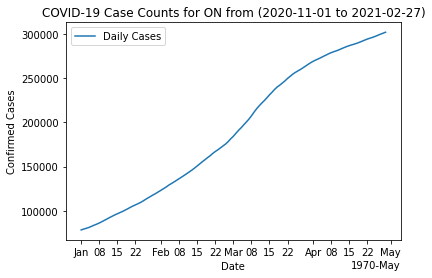

In [84]:
def format_date_axis(ax):
    """ format the dates shown on the x-axis of given axes, ax  """
    locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(case_dates, number_of_cases, label='Daily Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_title(f'COVID-19 Case Counts for {province} from ({start_date} to {end_date})')
ax.legend()
plt.show()